In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')
%matplotlib inline

In [13]:
#reading in dataset 
posts = pd.read_csv('../data/processed/cleaned_reddit_data.csv')

posts.head()

,Unnamed: 0,selftext,title,time_created,processed_text
0,0,"Hi all, hoping for some advise here. \n\nWe ar...",Changing insurance mid year?,11/20/2020 4:38,hi hoping advise currently wife's insurance (c...
1,1,It's my time picking out insurance and dealing...,PPO or CDHP as a person with a chronic disease?,11/20/2020 4:19,time picking insurance dealing premiums deduct...
2,2,I am wondering about the implications of answe...,How to answer questions about an injury/worker...,11/20/2020 4:08,wondering implications answering questionnaire...
3,3,I had spoken with someone over the phone with ...,Misinformed by my insurance,11/20/2020 3:07,spoken someone phone anthem (my insurance prov...
4,4,Can anyone provide me any information about th...,Blue Cross vs Cigna,11/20/2020 1:56,anyone provide information cigna connect 700-4...


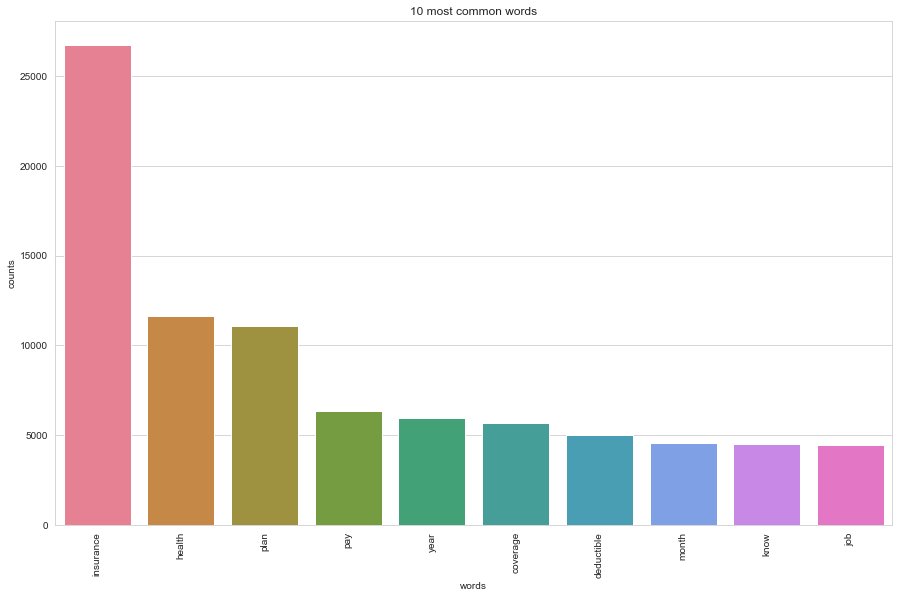

In [14]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(posts['processed_text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [15]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [5]:
# Tweak the two parameters below
number_topics = 5
number_words = 10

topics = [5, 10, 20, 50, 100]

for topic in topics:
    # Create and fit the LDA mode;
    print('With {} number of topics'.format(str(topic)))
    lda = LDA(n_components = topic, n_jobs=-1)
    lda.fit(count_data)# Print the topics found by the LDA model
    print("Topics found via LDA:")
    print_topics(lda, count_vectorizer, number_words)
    print('/n')

With 5 number of topics
Topics found via LDA:

Topic #0:
insurance health plan coverage job employer new just month plans

Topic #1:
health insurance medicare help state just know years medicaid ve

Topic #2:
insurance health income year just medicaid don plan job month

Topic #3:
deductible plan pay pocket year hsa insurance network cost max

Topic #4:
insurance doctor hospital network company said pay told covered just
/n
With 10 number of topics
Topics found via LDA:

Topic #0:
amp x200b insurance pay just company year month plan health

Topic #1:
surgery blue insurance cross shield health pre surgeon condition existing

Topic #2:
medicare month health insurance ve healthcare new like state years

Topic #3:
insurance health don just know time parents help need job

Topic #4:
insurance doctor said just told called company office covered got

Topic #5:
insurance coverage job new health plan enrollment employer cobra month

Topic #6:
deductible insurance network pay plan pocket hospita

In [2]:
from textblob import TextBlob
import nltk, re, string, collections
from nltk.util import ngrams

s to be 'too startup-y' my student health insurance was through aetna which i'm sure has tons of options as well are there any other big ones i should be looking at any companies that specialize in graduates (healthy working-age people) for better deals for example

i'm not trying to pay $1000 per month for a small deductible but i'm also not trying to pay $50 per month for a $10000 deductible 

any help will be greatly appreciated 
cheers hi all 

my wife and i are going to start the ivf  process for a baby we are on her work insurance she works for a company that has 30 employees or so however our existing health insurance does not cover ivf ( they cover the $2000-$8000 in drugs but not the $16k procedure)
 
apparently she only has access to 2 potential plans at work and her other plan also doesn't cover ivf 

i work as a 1099 consultant so i am on her insurance 

we would like to start ivf in about 1 month 

any suggestions on how we can find a health insurance that will cover ivf i

In [7]:
text = ' '.join(posts['processed_text'])
blob = TextBlob(text)

#get individual words
tokenized = blob.split()

#get the frequency of each bigram
Bigrams = ngrams(tokenized, 2)
BigramFreq = collections.Counter(Bigrams)

l = BigramFreq.most_common(10)
l

[(('i', 'have'), 7559),
 (('health', 'insurance'), 7531),
 (('i', 'am'), 6444),
 (('and', 'i'), 5083),
 (('i', 'was'), 4549),
 (('for', 'the'), 4333),
 (('in', 'the'), 4315),
 (('of', 'the'), 4059),
 (('to', 'get'), 3822),
 (('out', 'of'), 3783)]